In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Load and prepare data
df = pd.read_csv("D600 Task 3 Dataset 1 Housing Information.csv")
df_numeric = df.drop(columns=["ID", "Fireplace", "HouseColor", "Garage", "IsLuxury"])
y = df["Price"]

In [48]:
# Independent variables (non-categorical, continuous)
independent_variables = df[['SquareFootage', 'NumBathrooms', 'NumBedrooms',
                            'BackyardSpace', 'CrimeRate', 'SchoolRating',
                            'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate',
                            'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
                            'TransportAccess', 'PreviousSalePrice', 'Windows']]

In [50]:
# Standardize numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

In [52]:
# Convert the scaled data back into a DataFrame
standardized_df = pd.DataFrame(X_scaled, columns=df_numeric.columns)

# Add the target variable (Price) back in
standardized_df["Price"] = df["Price"].values

# Export standardized dataset to CSV
standardized_df.to_csv("Task3_Standardized_Dataset.csv", index=False)

In [54]:
# Dependent variable: Price
dependent_variable = df['Price']
print("Descriptive Statistics for Dependent Variable (Price):")
print(dependent_variable.describe())

print("\nDescriptive Statistics for Independent Variables:")
print(independent_variables.describe())

Descriptive Statistics for Dependent Variable (Price):
count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64

Descriptive Statistics for Independent Variables:
       SquareFootage  NumBathrooms  NumBedrooms  BackyardSpace    CrimeRate  \
count    7000.000000   7000.000000  7000.000000    7000.000000  7000.000000   
mean     1048.947459      2.131397     3.008571     511.507029    31.226194   
std       426.010482      0.952561     1.021940     279.926549    18.025327   
min       550.000000      1.000000     1.000000       0.390000     0.030000   
25%       660.815000      1.290539     2.000000     300.995000    17.390000   
50%       996.320000      1.997774     3.000000     495.965000    30.385000   
75%      1342.292500      2.763997     4.000000     704.012500    43.670000   
max      2874.700000      5.807239     7.000000    1631.36

In [56]:
# Run PCA on standardized features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Matrix of all principal components (scores matrix)
pca_matrix = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("Matrix of Principal Components (first 5 rows):")
print(pca_matrix.head())

# 2. PCA loadings matrix
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_numeric.columns  # ✅ matches shape (17, 17)
)

print("\nPCA Loadings Matrix:")
print(loadings)

Matrix of Principal Components (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.002508 -0.632978 -0.081154  1.467330  0.203681 -0.140622  1.580615   
1 -1.225528 -0.249734  0.900630  0.842799 -1.627443  0.382147 -0.481045   
2 -0.885745  3.078854  2.069739  1.516379  0.910887  0.434822  0.911634   
3 -1.434192 -0.537634  0.244302  0.266000 -0.175004  0.234292 -0.345255   
4 -2.561616  0.164708  1.010745  0.259839 -0.063403 -1.037852 -0.032391   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.664823 -0.321043 -0.481561 -0.485994 -0.760199 -0.163886  0.852493   
1 -0.786419 -0.336822 -1.501359  0.262421  0.065380  0.453547  0.130893   
2 -0.103878 -0.348409  0.610951 -0.021700  0.646099  0.317305 -0.800818   
3 -1.515564 -0.253884 -0.272115 -1.316417  0.777845  0.351283 -0.139690   
4 -0.182677 -1.501229  0.926902  2.284581  0.459546  0.469513  0.297415   

       PC15      PC16      PC17  
0 -0.093871  0.20


Eigenvalues Array:
[3.86973164 1.59636726 1.39724345 1.17419403 1.0664318  1.01097475
 0.93584256 0.91854302 0.90430243 0.84637105 0.83250402 0.66863728
 0.51208966 0.45936969 0.40602325 0.24252047 0.16128257]

Number of principal components retained (Kaiser Rule): 6


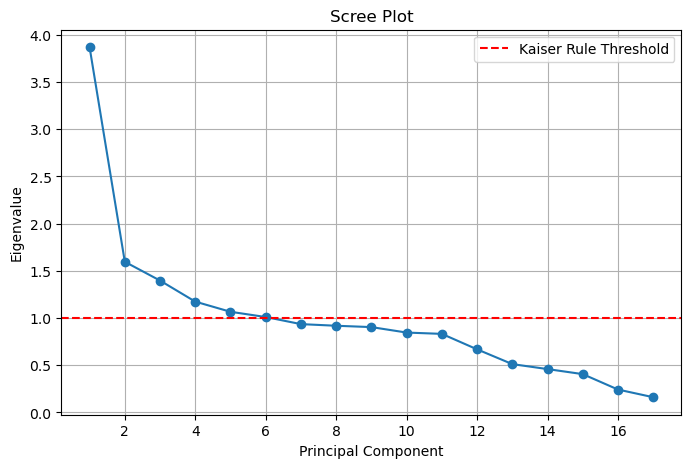

In [58]:
#PCA 
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Extract eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

print("\nEigenvalues Array:")
print(eigenvalues)

# 2. Apply Kaiser Rule: retain components with eigenvalue > 1
kaiser_components = sum(eigenvalues > 1)
print(f"\nNumber of principal components retained (Kaiser Rule): {kaiser_components}")

# 3. Optional: Scree plot for visual confirmation
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Rule Threshold')
plt.legend()
plt.grid(True)
plt.show()



In [60]:
# Variance explained by each component (as a fraction)
explained_variance_ratio = pca.explained_variance_ratio_

# Display as array
print("\nExplained Variance Ratio for each Principal Component:")
print(np.round(explained_variance_ratio, 4))


Explained Variance Ratio for each Principal Component:
[0.2276 0.0939 0.0822 0.0691 0.0627 0.0595 0.055  0.054  0.0532 0.0498
 0.049  0.0393 0.0301 0.027  0.0239 0.0143 0.0095]


In [62]:
# Retain PCA components per Kaiser Rule
X_pca_selected = X_pca[:, :kaiser_components]

In [64]:
# 5. Define X and y
X = pd.DataFrame(X_pca_selected, columns=[f"PC{i+1}" for i in range(X_pca_selected.shape[1])])
y = df["Price"]

# 6. Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Fit initial OLS model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3653.
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        23:29:48   Log-Likelihood:                -70277.
No. Observations:                5600   AIC:                         1.406e+05
Df Residuals:                    5593   BIC:                         1.406e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.078e+05    912.295    337.354      0.0

In [26]:
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues

    while p_values.max() > significance_level:
        remove_var = p_values.idxmax()
        X = X.drop(columns=remove_var)
        model = sm.OLS(y, X).fit()
        p_values = model.pvalues
        print(model.summary())  # Optional: see progress

    return model

# Run backward elimination
final_model = backward_elimination(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4384.
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        23:09:18   Log-Likelihood:                -70277.
No. Observations:                5600   AIC:                         1.406e+05
Df Residuals:                    5594   BIC:                         1.406e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.078e+05    912.298    337.351      0.0

In [28]:
 # Regression with statsmodels
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3653.
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        23:09:18   Log-Likelihood:                -70277.
No. Observations:                5600   AIC:                         1.406e+05
Df Residuals:                    5593   BIC:                         1.406e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.078e+05    912.295    337.354      0.0

In [68]:
print("\nModel Evaluation Metrics:")
print("Adjusted R²:", final_model.rsquared_adj)
print("R²:", final_model.rsquared)
print("F-statistic:", final_model.fvalue)
print("Prob (F-statistic):", final_model.f_pvalue)
print("Coefficients:\n", final_model.params)
print("P-values:\n", final_model.pvalues)



Model Evaluation Metrics:
Adjusted R²: 0.796442266306274
R²: 0.7965876906561177
F-statistic: 5477.67751076248
Prob (F-statistic): 0.0
Coefficients:
 const    307774.316426
PC1       64380.468755
PC3      -27698.597975
PC4      -26601.940349
PC5        3476.657591
dtype: float64
P-values:
 const     0.000000e+00
PC1       0.000000e+00
PC3      3.530505e-256
PC4      3.465156e-203
PC5       9.071100e-05
dtype: float64


In [70]:
train_preds = model.predict(X_train_const)
mse_train = mean_squared_error(y_train, train_preds)
print("Training MSE:", mse_train)


Training MSE: 4653712690.110259


In [72]:
test_preds = model.predict(sm.add_constant(X_test))
mse_test = mean_squared_error(y_test, test_preds)
print("Test MSE:", mse_test)


Test MSE: 4631432665.18786
